In [ ]:
from sklearn.svm import SVC, LinearSVC
from sklearn.datasets import fetch_openml
from sklearn.model_selection import learning_curve, RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split, KFold
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
X, y = fetch_openml('mnist_784', return_X_y=True)

In [ ]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.2, random_state=42)

#### RBF

In [ ]:
model_rbf = SVC(kernel='rbf')
model_rbf.fit(X_train, y_train)
print(model_rbf.score(X_train, y_train), model_rbf.score(X_test, y_test))

0.9864464285714286 0.9631428571428572


In [ ]:
model_rbf.get_params

In [ ]:
model_rbf_C10 = SVC(kernel='rbf', C=10)
model_rbf_C100 = SVC(kernel='rbf', C=100)
model_rbf_C1000 = SVC(kernel='rbf', C=1000)
model_rbf_C10000 = SVC(kernel='rbf', C=10000)

In [ ]:
model_rbf_C10.fit(X_train, y_train)
print(model_rbf_C10.score(X_train, y_train), model_rbf_C10.score(X_test, y_test))

0.9993214285714286 0.9700714285714286


In [ ]:
model_rbf_C100.fit(X_train, y_train)
print(model_rbf_C100.score(X_train, y_train), model_rbf_C100.score(X_test, y_test))

1.0 0.9697857142857143


In [ ]:
model_rbf_C1000.fit(X_train, y_train)
print(model_rbf_C1000.score(X_train, y_train), model_rbf_C1000.score(X_test, y_test))

1.0 0.9697857142857143


In [ ]:
model_rbf_C10000.fit(X_train, y_train)
print(model_rbf_C10000.score(X_train, y_train), model_rbf_C10000.score(X_test, y_test))

1.0 0.9697857142857143


In [ ]:
model_rbf_g1 = SVC(kernel='rbf', gamma=0.0001)
model_rbf_g2 = SVC(kernel='rbf', gamma=0.001)
model_rbf_g3 = SVC(kernel='rbf', gamma=0.01)
model_rbf_g4 = SVC(kernel='rbf', gamma=0.1)
model_rbf_g5 = SVC(kernel='rbf', gamma=1)
model_rbf_g6 = SVC(kernel='rbf', gamma=10)
model_rbf_g7 = SVC(kernel='rbf', gamma=100)

In [ ]:
model_rbf_g1.fit(X_train, y_train)
print(model_rbf_g1.score(X_train, y_train), model_rbf_g1.score(X_test, y_test))


0.93975 0.9342142857142857


In [ ]:
model_rbf_g2.fit(X_train, y_train)
print(model_rbf_g2.score(X_train, y_train), model_rbf_g2.score(X_test, y_test))

0.9812142857142857 0.9606428571428571


In [ ]:
model_rbf_g3.fit(X_train, y_train)
print(model_rbf_g3.score(X_train, y_train), model_rbf_g3.score(X_test, y_test))

0.9996428571428572 0.8482142857142857


In [ ]:
model_rbf_g4.fit(X_train, y_train)
print(model_rbf_g4.score(X_train, y_train), model_rbf_g4.score(X_test, y_test))

1.0 0.19


#### POLY

In [ ]:
model_poly    = SVC(kernel='poly')
model_poly.fit(X_train, y_train)
print(model_poly.score(X_train, y_train), model_poly.score(X_test, y_test))

0.9771785714285715 0.9613571428571429


#### SIGMOID

In [ ]:
model_sigmoid = SVC(kernel='sigmoid')
model_sigmoid.fit(X_train, y_train)
print(model_sigmoid.score(X_train, y_train), model_sigmoid.score(X_test, y_test))

0.8863571428571428 0.8843571428571428


#### LINEAR

In [ ]:
model_linear = LinearSVC()
model_linear.fit(X_train, y_train)
print(model_linear.score(X_train, y_train), model_linear.score(X_test, y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.9220714285714285 0.906


### Learning Curve

In [ ]:
model_rbf = SVC(kernel='rbf')
train_sizes, train_scores, val_scores = learning_curve(model_rbf, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1, 10), verbose=1)

[learning_curve] Training set sizes: [  448  5376 10304 15232 20160 25088 30016 34944 39872 44800]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 32.3min finished


In [ ]:
train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

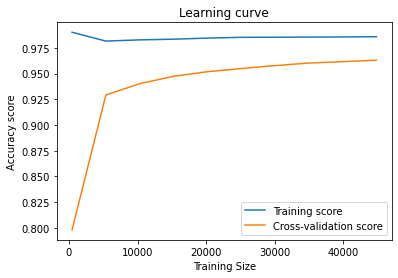

In [ ]:
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, val_mean, label='Cross-validation score')
plt.title('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

### Finding the best parameters

In [ ]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 10)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 3, 5, 10]}]


# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True,
                        n_jobs=-1)      

# fit the model
model_cv.fit(X_train, y_train)
model_cv.best_params_

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 out of  60 | elapsed: 136.7min remaining: 58.6min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 166.8min finished


{'C': 10, 'gamma': 0.001}

In [ ]:
model_cv.best_score_

0.9710357142857143

In [ ]:
model_rbf_C10_g0001 = SVC(kernel='rbf', C=10, gamma=0.001)
model_rbf_C10_g0001.fit(X_train, y_train)
print(model_rbf_C10_g0001.score(X_train, y_train))
print(model_rbf_C10_g0001.score(X_test, y_test))

0.9983571428571428
0.9712857142857143


In [ ]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 10)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'C': [1, 3, 5, 7, 10] } ]


# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv_C = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True,
                        n_jobs=-1)      

# fit the model
model_cv_C.fit(X_train, y_train)
model_cv_C.best_params_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 35.1min finished


{'C': 10}

In [ ]:
model_cv_C.best_score_

0.9705892857142857